In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("amalgamated.parquet")

In [3]:
metrics = [
    "ReferenceRateUSD",
    "AdrBalNtv0.01Cnt",
    "AdrBalNtv0.1Cnt",
    "AdrBalNtv1Cnt",
    "BlkSizeMeanByte",
    "FeeByteMeanNtv",
    "FlowInExNtv",
    "FlowOutExNtv",
    "HashRate",
    "SplyAct1d",
    "TxCnt",
    "^IRX",
    "^TNX",
    "^TYX",
    "SPY",
    "QQQ",
    "Global_Liquidity_Index"
]

In [4]:
df = df[metrics]

In [5]:
df = df.tail(520)

## Pearson

Pearson's Correlation Coefficient is a measure of linear correlation between two variables:

1. **Concept**: It quantifies the degree to which a linear relationship exists between two variables. The calculation is based on covariance and standard deviations of the variables.

2. **Usage in Analysis**: Pearson's correlation is widely used for variables that have a roughly linear relationship and are measured on an interval or ratio scale.

3. **Handling of Non-Linearity**: It is not suitable for capturing non-linear relationships. Its effectiveness diminishes with non-linear data or outliers.

4. **Score Range**: The coefficient ranges from -1 (perfect negative linear correlation) to +1 (perfect positive linear correlation), with 0 indicating no linear correlation.

Pearson's correlation is a fundamental tool in statistical analysis, particularly useful for quantifying linear relationships in data that are well-behaved and normally distributed.

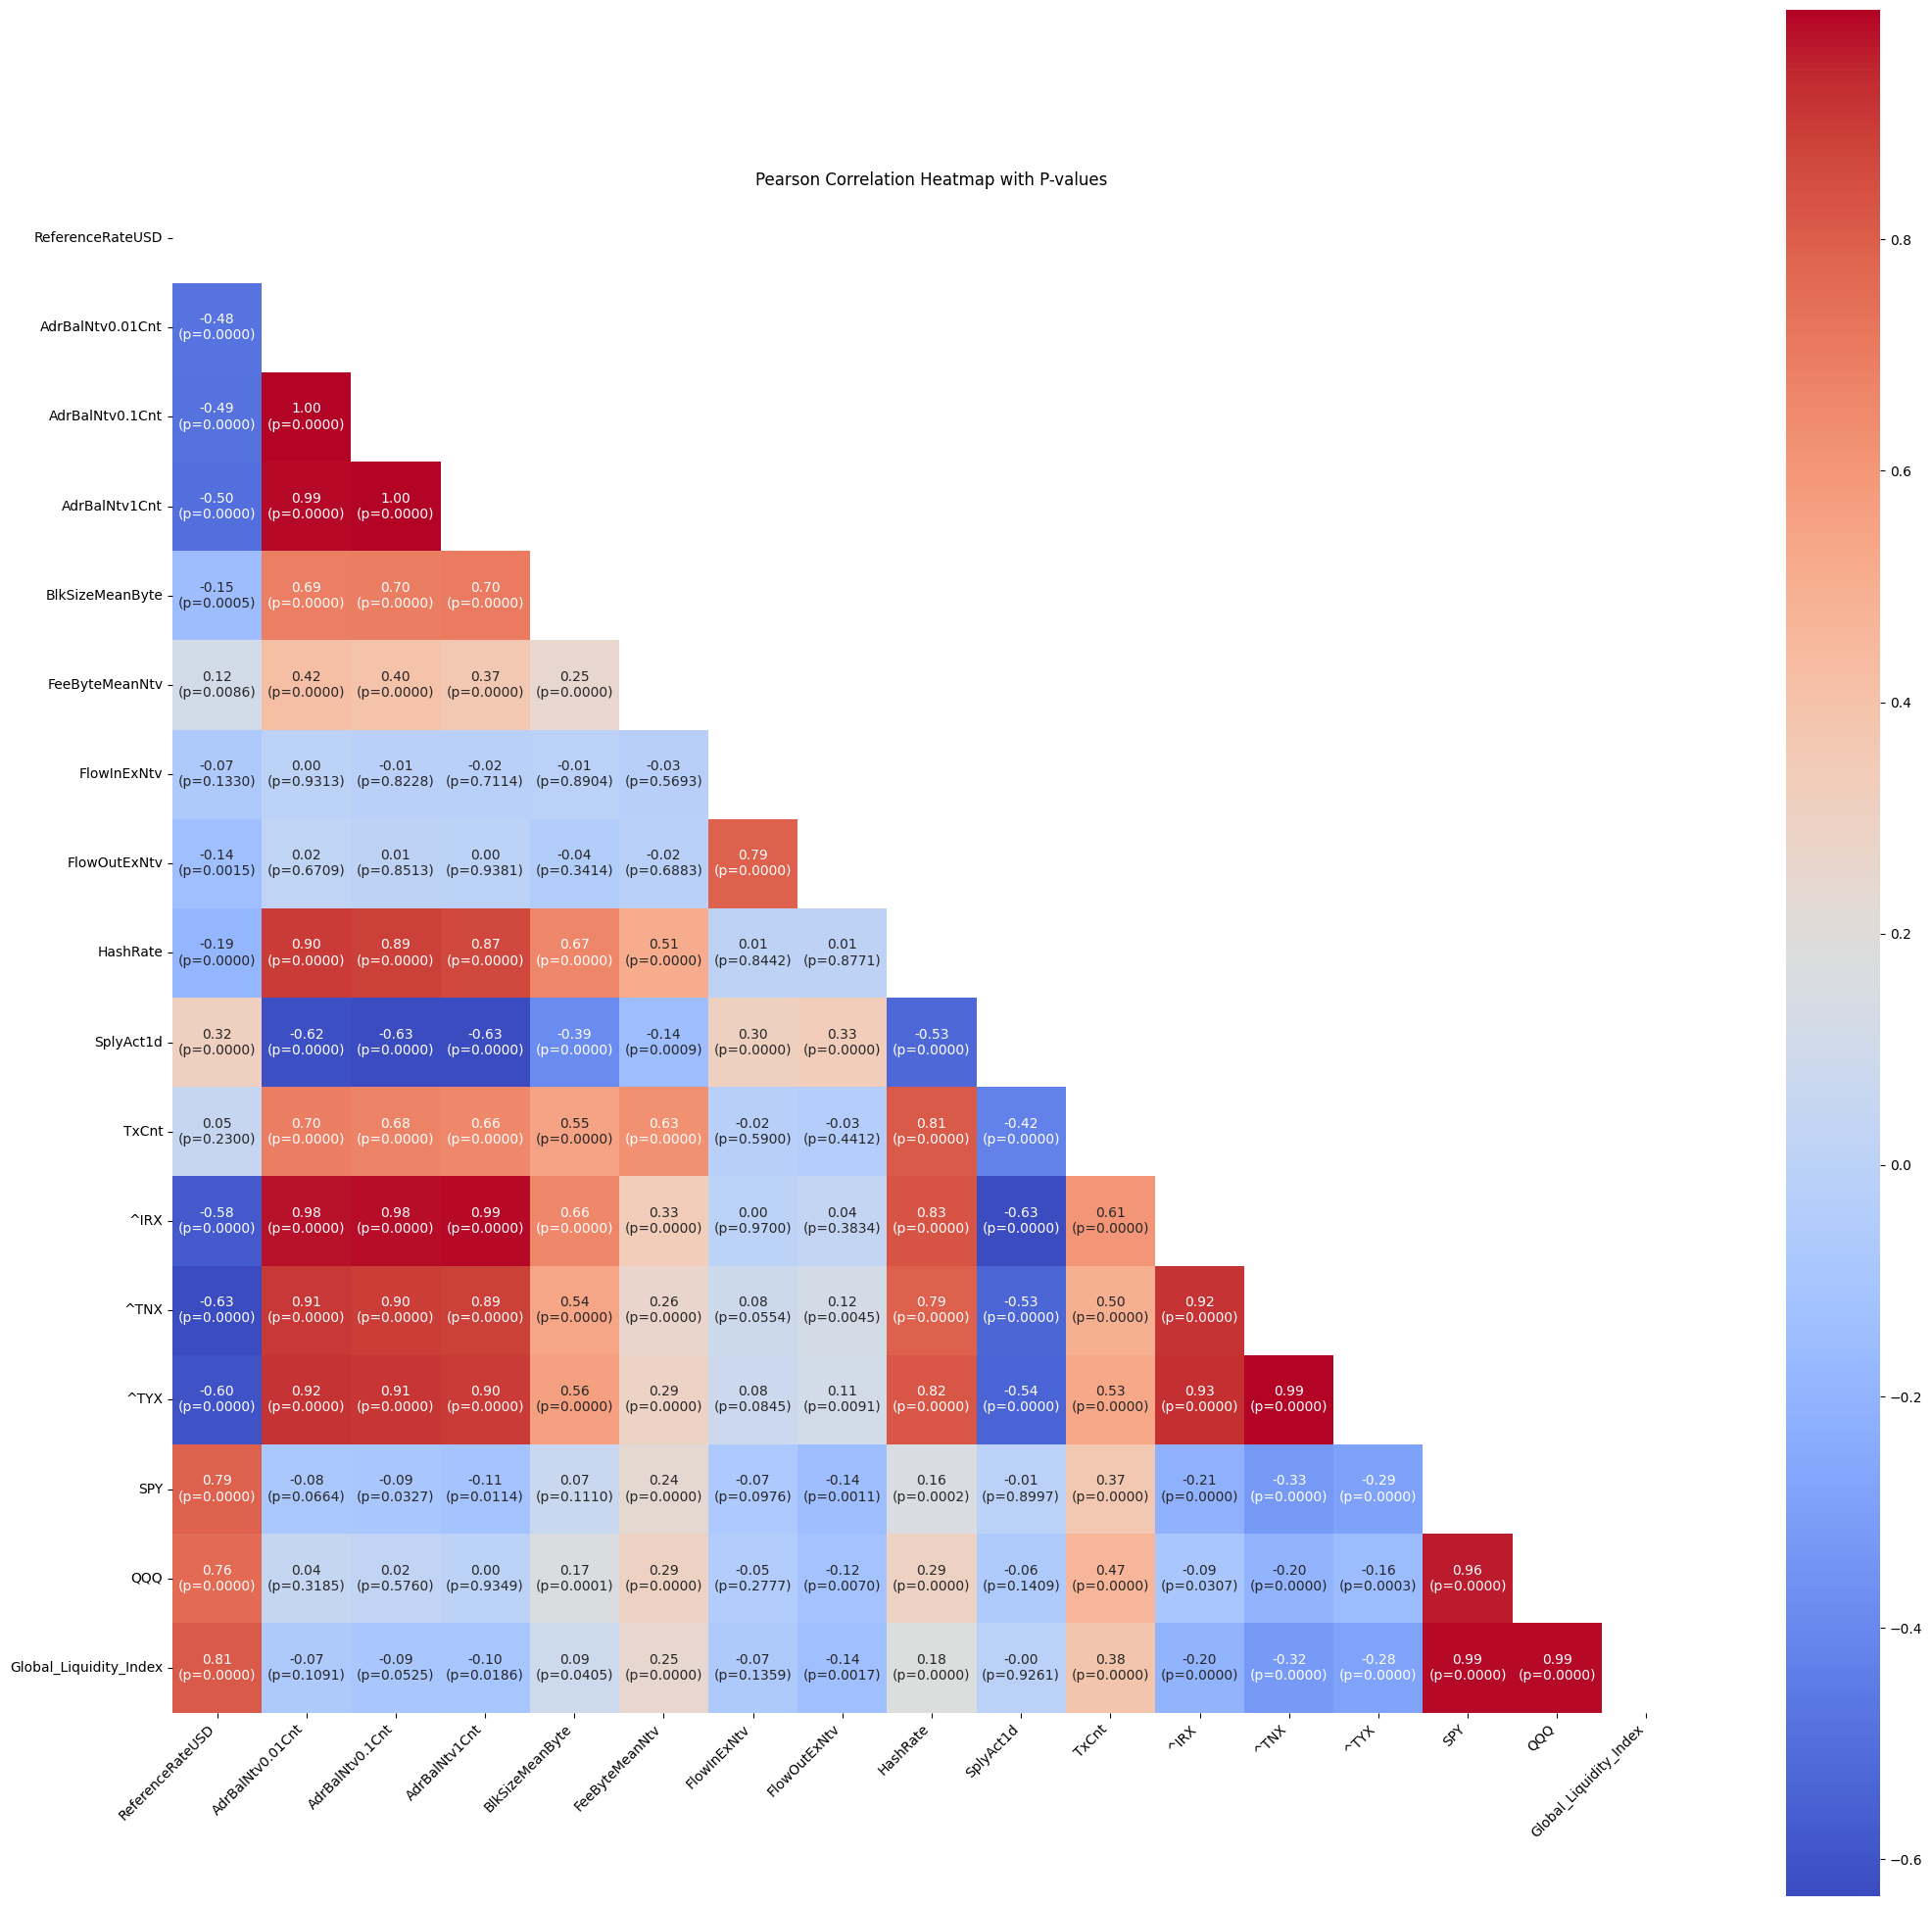

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Assuming 'df' is your DataFrame and is already loaded

# Function to compute pairwise Pearson correlation and p-values
def pearson_corr_pval(df):
    cols = df.columns
    n = len(cols)
    corr_matrix = np.zeros((n, n), dtype=float)
    pval_matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            if i != j:
                corr, pval = pearsonr(df[cols[i]], df[cols[j]])
                corr_matrix[i, j] = corr
                pval_matrix[i, j] = pval
            else:
                corr_matrix[i, j] = 1
                pval_matrix[i, j] = 0

    corr_matrix = pd.DataFrame(corr_matrix, columns=cols, index=cols)
    pval_matrix = pd.DataFrame(pval_matrix, columns=cols, index=cols)
    return corr_matrix, pval_matrix

# Compute the Pearson Correlation Matrix and P-values
correlation_matrix, pval_matrix = pearson_corr_pval(df)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Combine correlation values and p-values in labels
labels = np.asarray([['{:.2f}\n(p={:.4f})'.format(correlation_matrix.iloc[i, j], pval_matrix.iloc[i, j]) 
                      if i != j else '' for j in range(len(df.columns))] 
                     for i in range(len(df.columns))])

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and labels
sns.heatmap(correlation_matrix, mask=mask, annot=labels, fmt="", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap with P-values')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


## Spearman

Spearman's Rank Correlation is a non-parametric measure of statistical dependence between two variables:

1. **Concept**: It evaluates how well the relationship between two variables can be described using a monotonic function. It's based on the ranks of the data rather than the raw data itself.

2. **Usage in Analysis**: Spearman's correlation is used when the data do not necessarily meet the assumptions of Pearson's correlation (like normal distribution) and particularly for ordinal data.

3. **Handling of Non-Linearity**: It can identify monotonic relationships, both linear and nonlinear, unlike Pearson’s correlation which is best suited for linear relationships.

4. **Score Range**: The values range from -1 to +1, where -1 indicates a perfect negative monotonic correlation, +1 indicates a perfect positive monotonic correlation, and 0 indicates no monotonic correlation.

Spearman's correlation is especially useful for data that are not normally distributed or have a non-linear relationship.

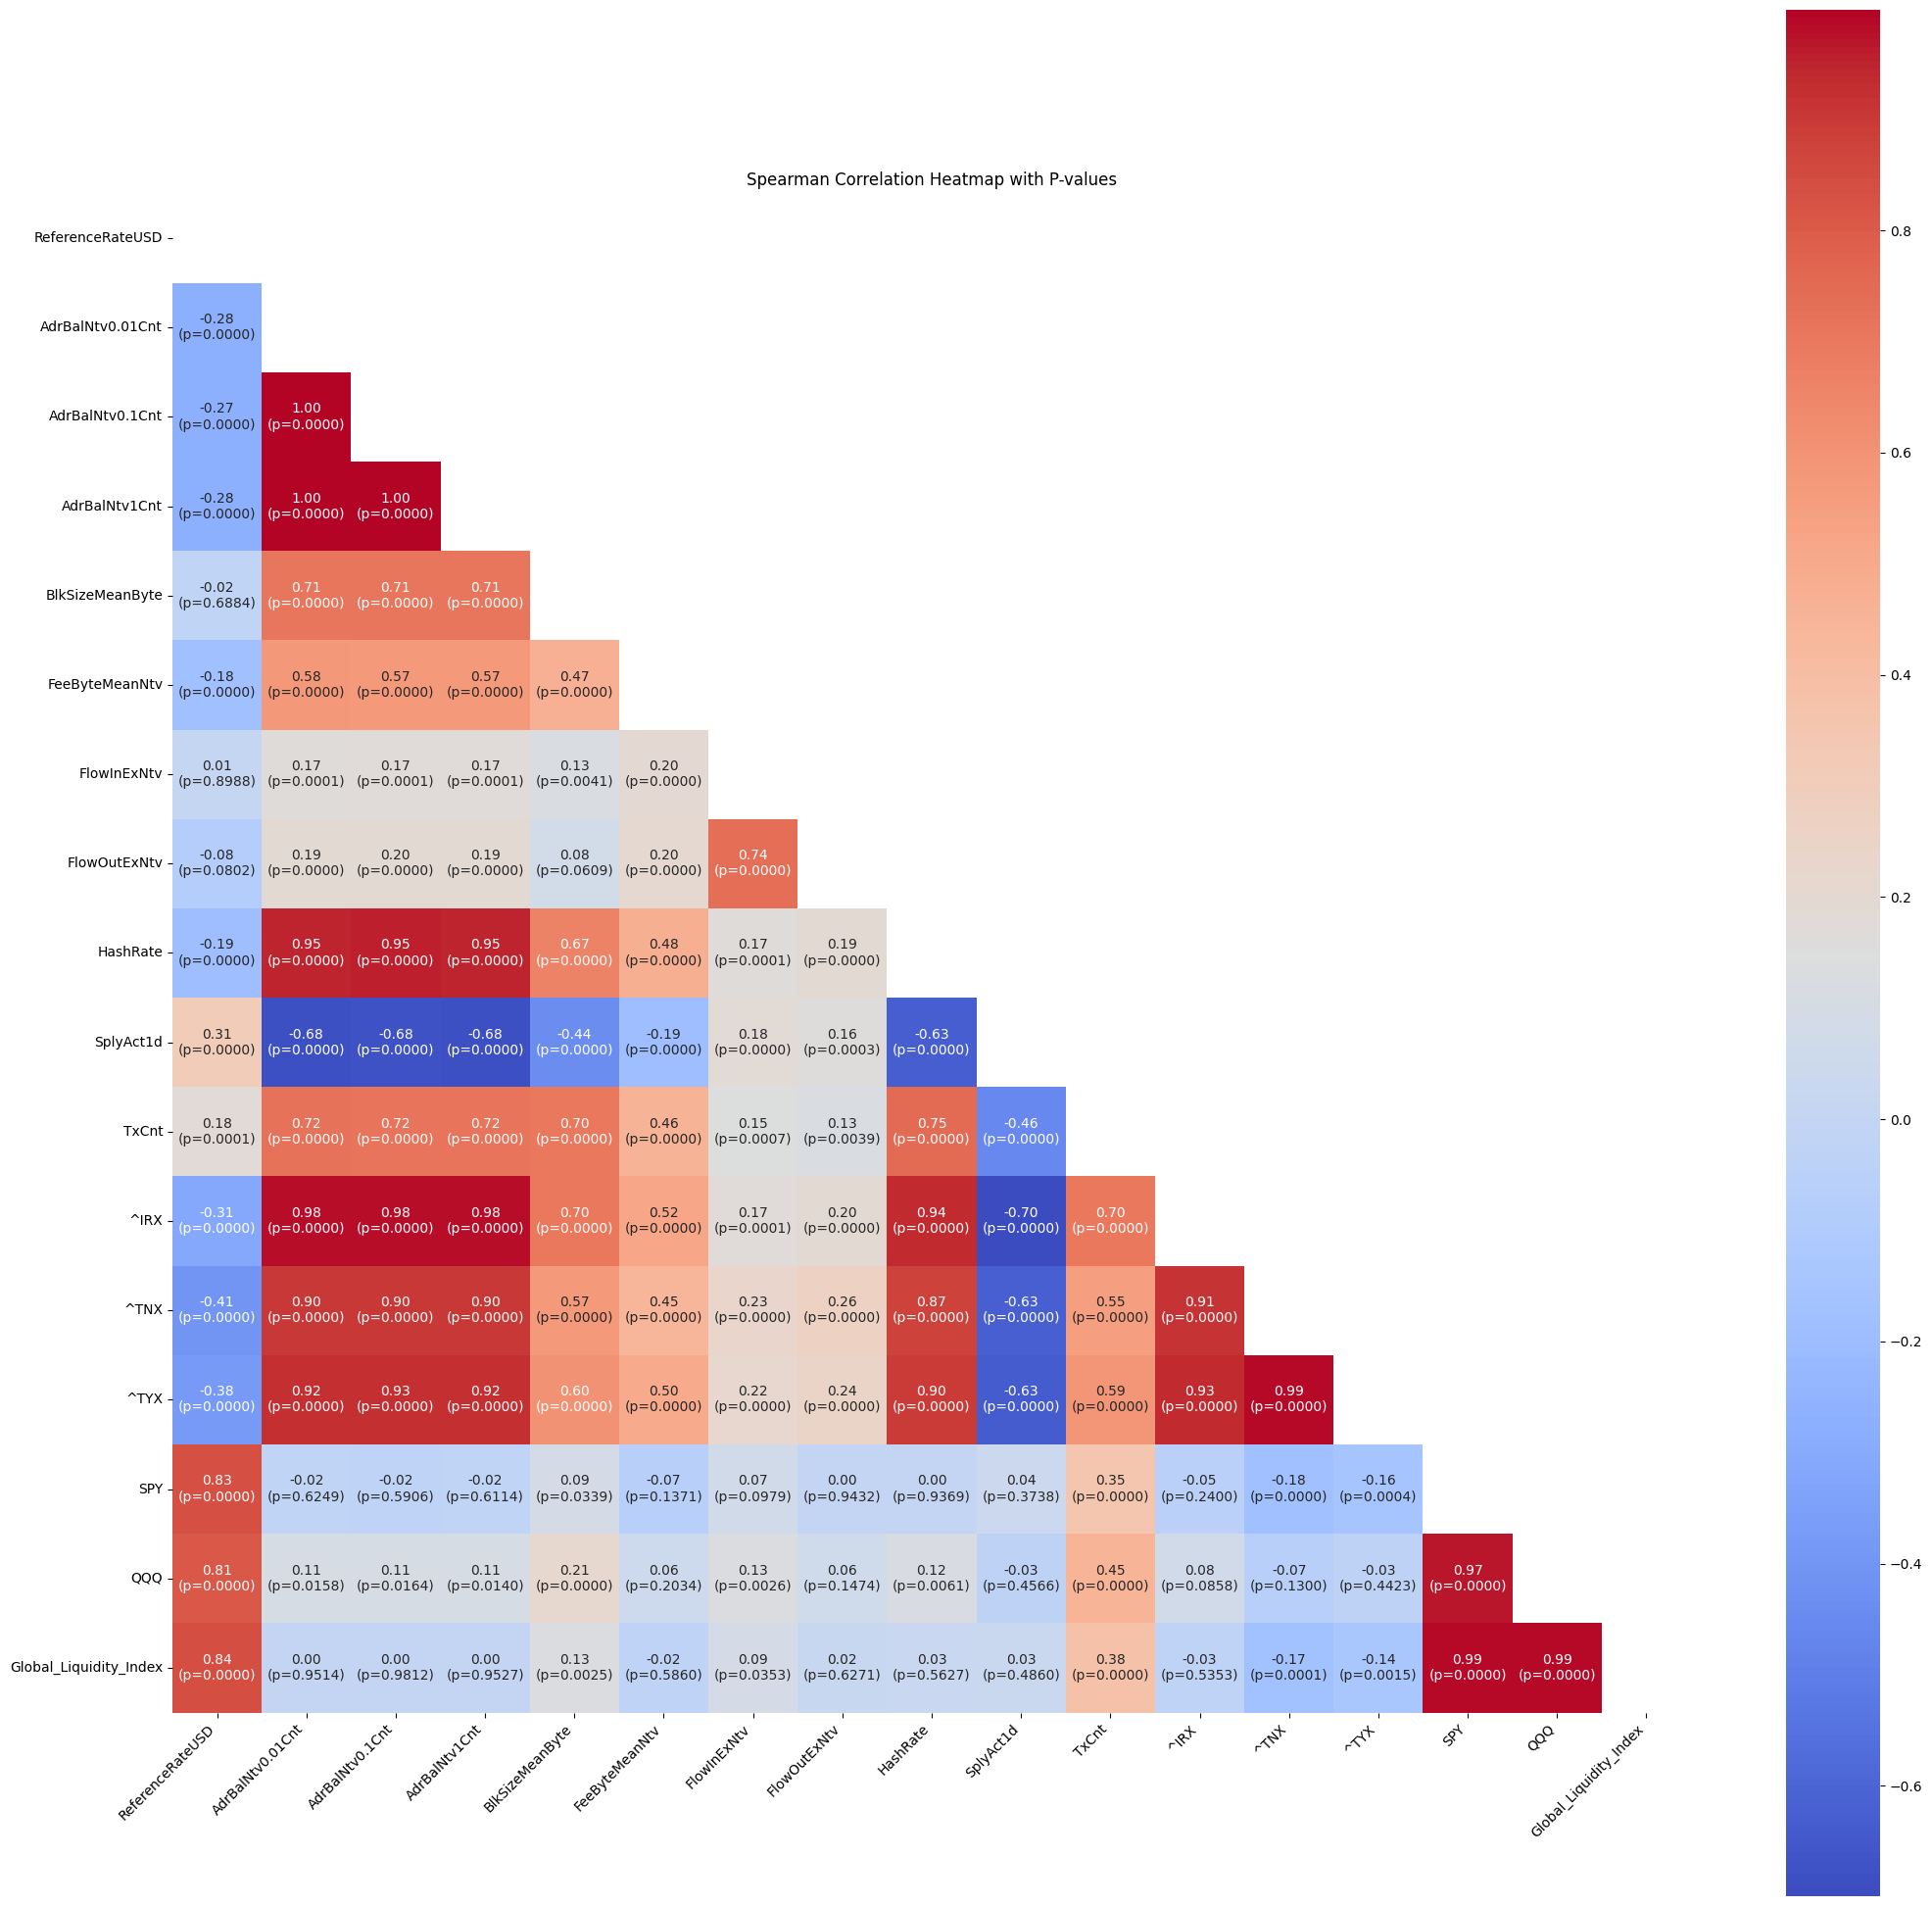

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Function to compute pairwise Spearman correlation and p-values
def spearman_corr_pval(df):
    cols = df.columns
    n = len(cols)
    corr_matrix = np.zeros((n, n), dtype=float)
    pval_matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            if i != j:
                corr, pval = spearmanr(df[cols[i]], df[cols[j]])
                corr_matrix[i, j] = corr
                pval_matrix[i, j] = pval
            else:
                corr_matrix[i, j] = 1
                pval_matrix[i, j] = 0

    corr_matrix = pd.DataFrame(corr_matrix, columns=cols, index=cols)
    pval_matrix = pd.DataFrame(pval_matrix, columns=cols, index=cols)
    return corr_matrix, pval_matrix

# Assuming 'df' is your DataFrame and is already loaded
correlation_matrix, pval_matrix = spearman_corr_pval(df)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Combine correlation values and p-values in labels
labels = np.asarray([['{:.2f}\n(p={:.4f})'.format(correlation_matrix.iloc[i, j], pval_matrix.iloc[i, j]) 
                      if i != j else '' for j in range(len(df.columns))] 
                     for i in range(len(df.columns))])

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and labels
sns.heatmap(correlation_matrix, mask=mask, annot=labels, fmt="", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap with P-values')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


## Kendall Tau

Kendall's Tau is a statistic used to measure the ordinal association between two measured quantities:

1. **Concept**: It assesses the strength and direction of a relationship between two ranked variables. It's based on the ranks rather than the raw data.

2. **Usage in Analysis**: Primarily used for non-parametric data, Kendall's Tau evaluates whether there is a monotonic relationship between variables.

3. **Handling of Non-Linearity**: Unlike Pearson's correlation, Kendall's Tau can capture non-linear relationships and is less sensitive to outliers.

4. **Score Range**: Values range from -1 (perfect inverse relationship) to +1 (perfect direct relationship). A value of 0 indicates no association.

Kendall's Tau is valuable for analyzing data without assuming a specific distribution, making it robust for various applications, including ordinal data.

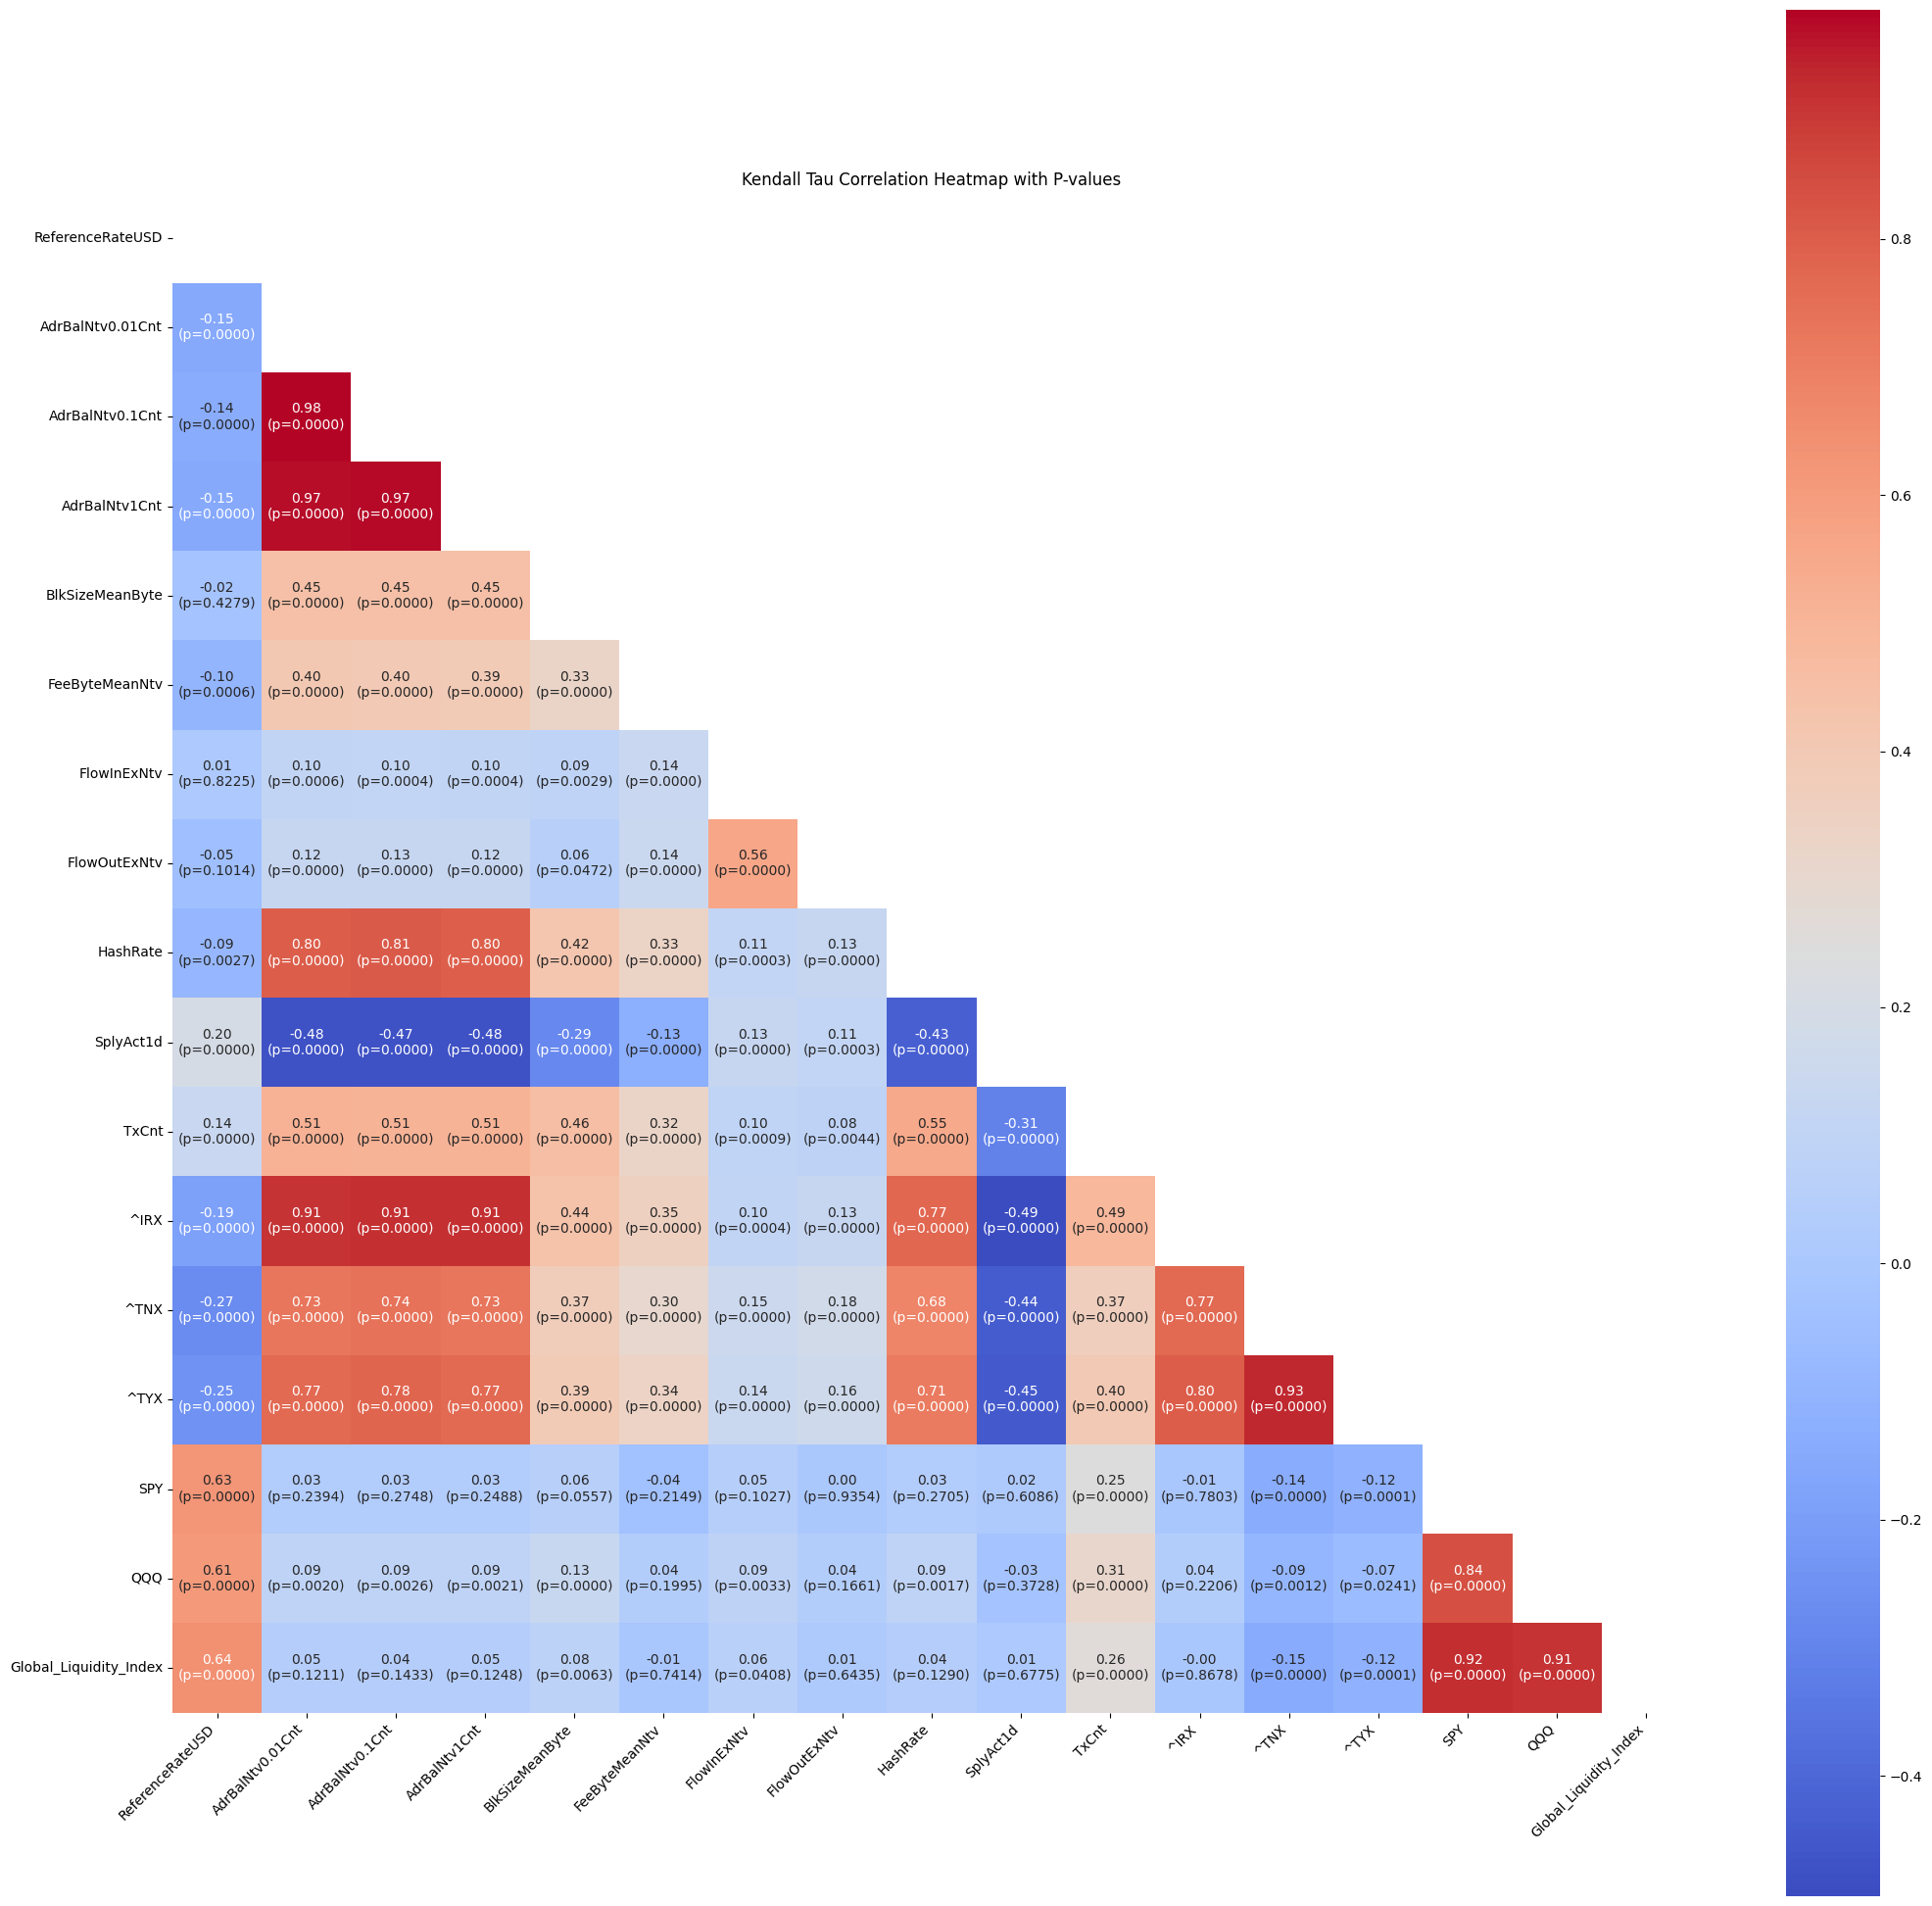

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

# Assuming 'df' is your DataFrame and is already loaded

# Function to compute pairwise Kendall's Tau correlation and p-values
def kendall_corr_pval(df):
    cols = df.columns
    n = len(cols)
    corr_matrix = np.zeros((n, n), dtype=float)
    pval_matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            if i != j:
                corr, pval = kendalltau(df[cols[i]], df[cols[j]])
                corr_matrix[i, j] = corr
                pval_matrix[i, j] = pval
            else:
                corr_matrix[i, j] = 1
                pval_matrix[i, j] = 0

    corr_matrix = pd.DataFrame(corr_matrix, columns=cols, index=cols)
    pval_matrix = pd.DataFrame(pval_matrix, columns=cols, index=cols)
    return corr_matrix, pval_matrix

# Compute the Kendall Tau Correlation Matrix and P-values
correlation_matrix, pval_matrix = kendall_corr_pval(df)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Combine correlation values and p-values in labels
labels = np.asarray([['{:.2f}\n(p={:.4f})'.format(correlation_matrix.iloc[i, j], pval_matrix.iloc[i, j]) 
                      if i != j else '' for j in range(len(df.columns))] 
                     for i in range(len(df.columns))])

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap with the mask and labels
sns.heatmap(correlation_matrix, mask=mask, annot=labels, fmt="", cmap='coolwarm', square=True)
plt.title('Kendall Tau Correlation Heatmap with P-values')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


## Mutual Information

Mutual Information Regression scores measure the dependency between variables in regression problems. Unlike linear correlation measures, mutual information can capture any kind of relationship, not just linear.

1. **Concept**: It quantifies how much knowledge of one variable reduces uncertainty about another. High mutual information indicates a large reduction in uncertainty; low mutual information suggests little to no reduction.

2. **Usage in Regression**: In regression analysis, mutual information scores can assess how much information a feature shares with the target variable. Features with higher scores are more predictive of the target.

3. **Non-linearity**: One of the key advantages is its ability to detect any kind of relationship, whether linear or nonlinear.

4. **Score Range**: The score ranges from 0 (no mutual information, independent variables) to higher values indicating stronger dependencies. The upper limit is not fixed, depending on the data distribution and the nature of the variables.iables

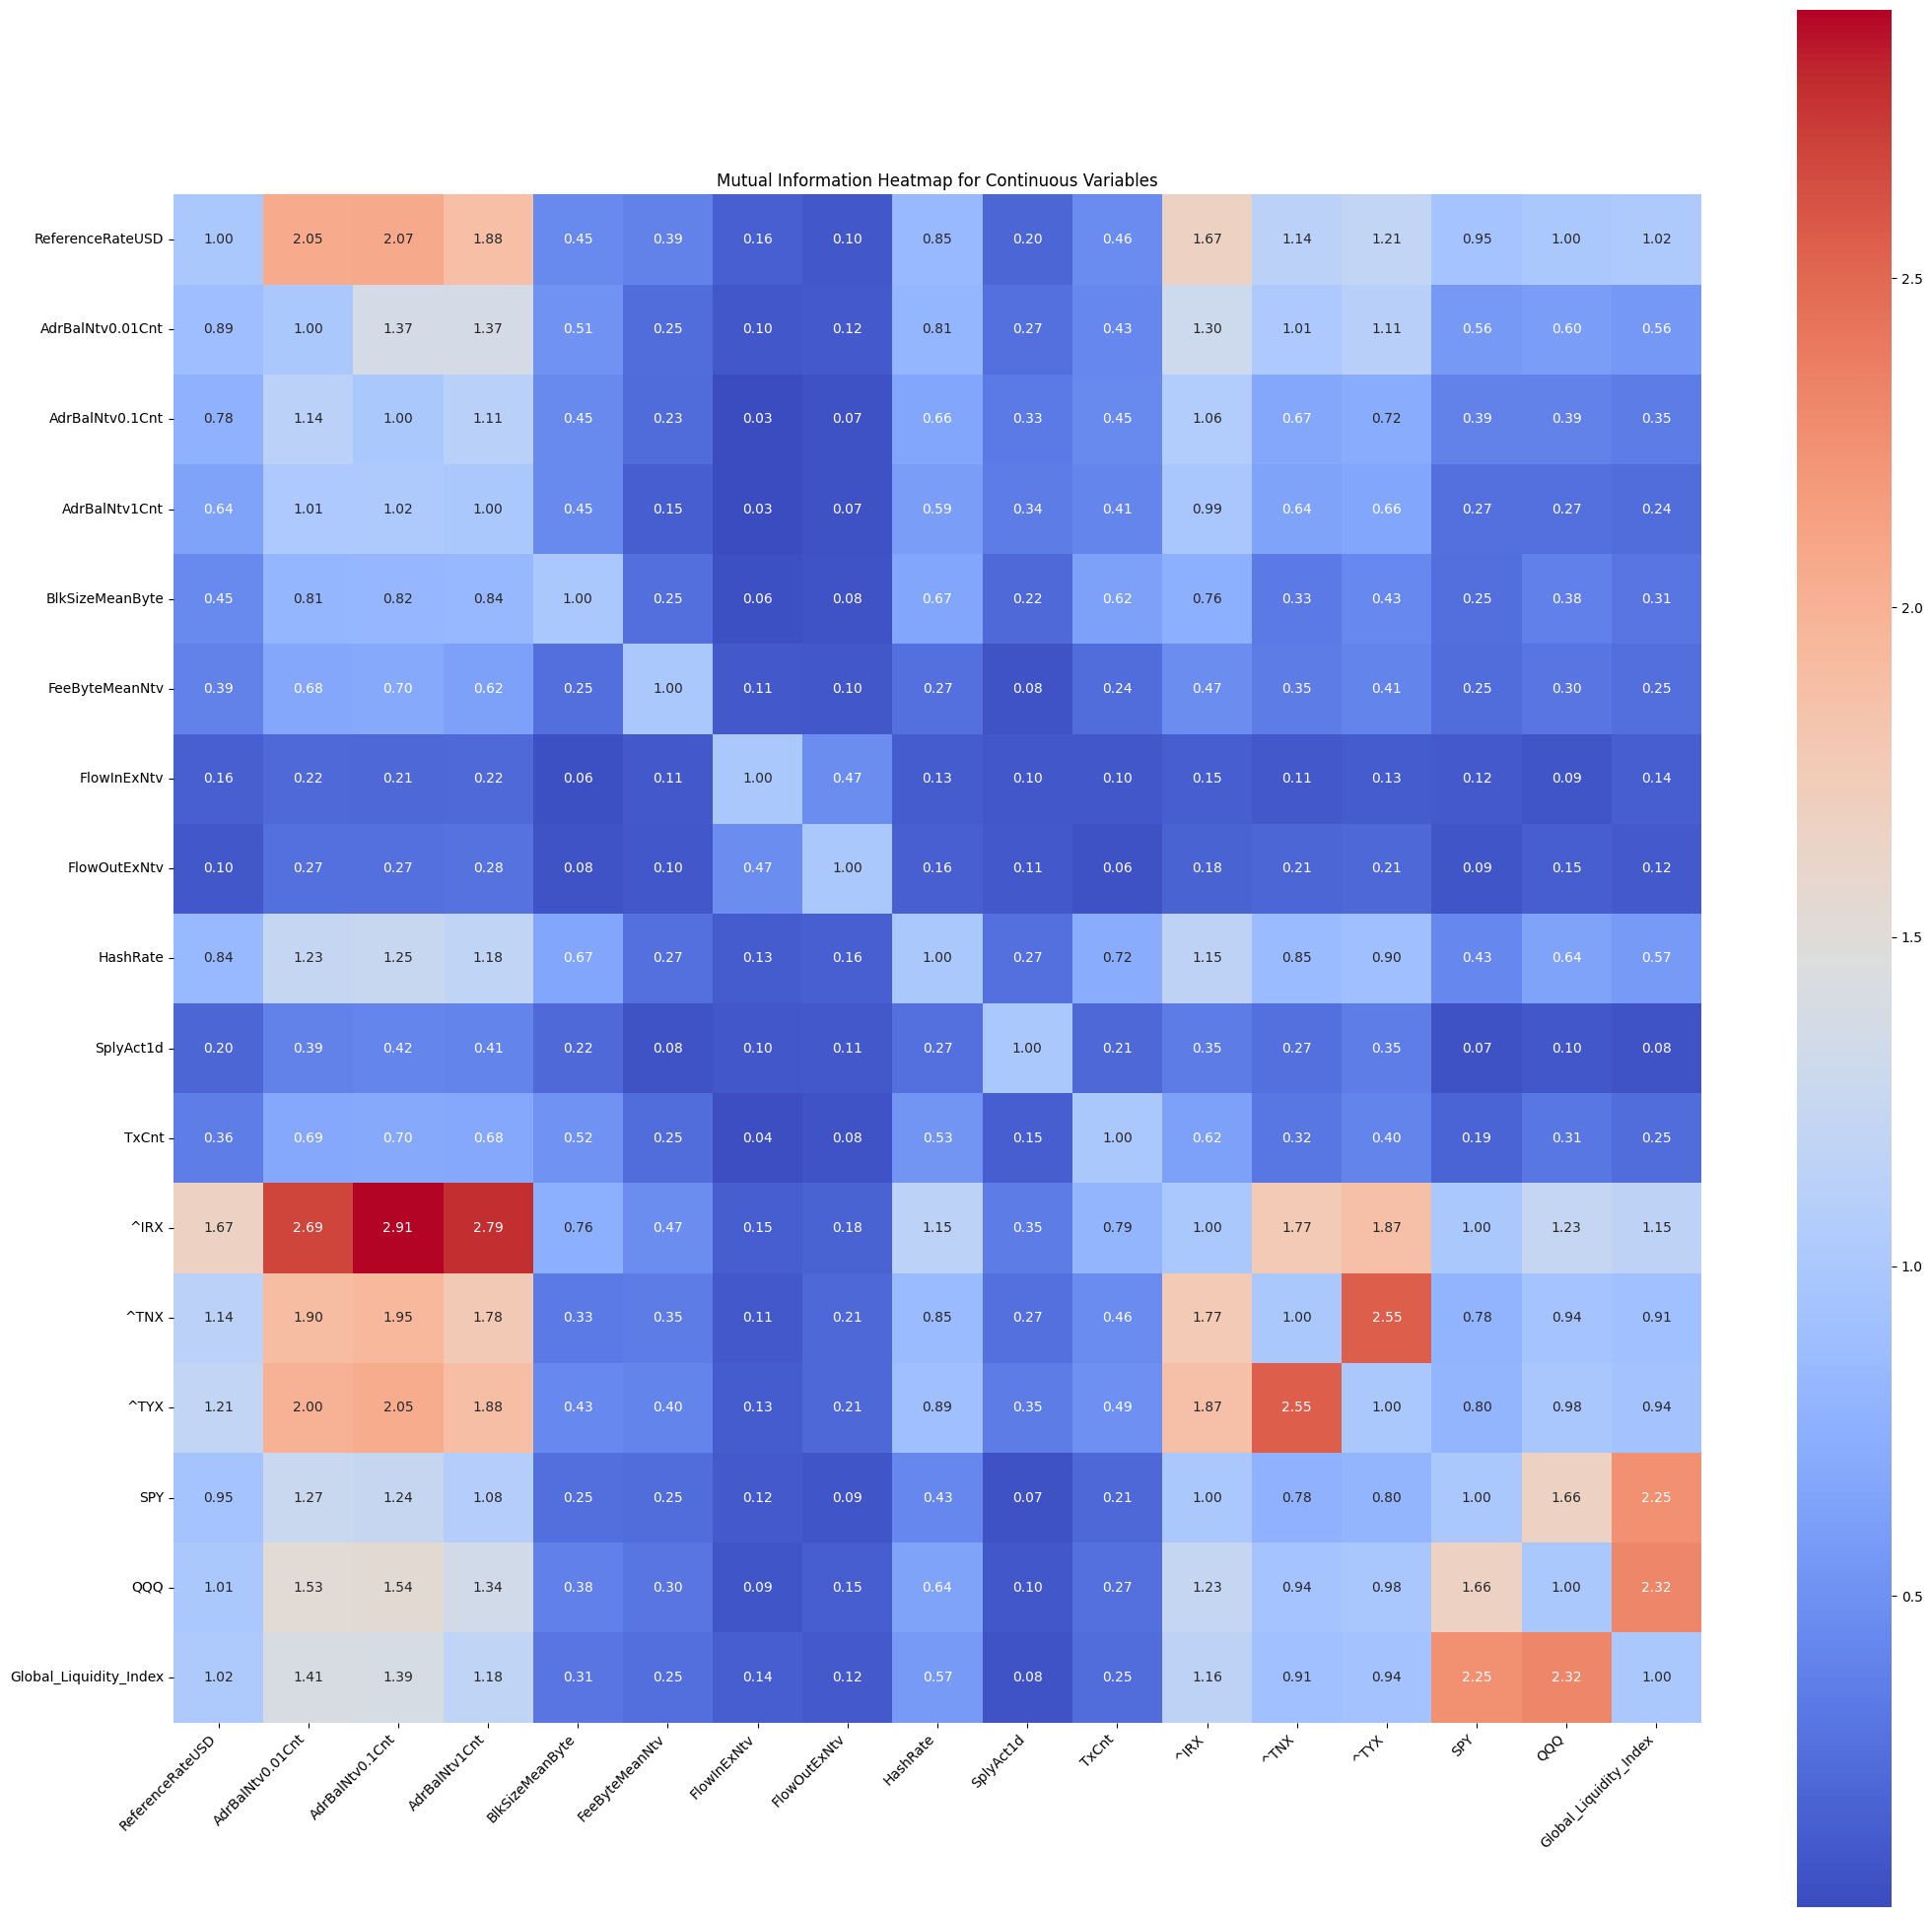

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression

# Function to compute pairwise Mutual Information for continuous variables
def mutual_info_matrix_continuous(df):
    cols = df.columns
    n = len(cols)
    mi_matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            if i != j:
                # Estimate mutual information for a continuous target variable
                mi = mutual_info_regression(df[[cols[i]]], df[cols[j]])[0]
                mi_matrix[i, j] = mi
            else:
                mi_matrix[i, j] = 1  # Max Mutual Information with itself

    mi_matrix = pd.DataFrame(mi_matrix, columns=cols, index=cols)
    return mi_matrix

# Assuming 'df' is your DataFrame and is already loaded
mi_matrix = mutual_info_matrix_continuous(df)

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap
sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mutual Information Heatmap for Continuous Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


## Distance Correlation

Distance Correlation is a measure of statistical dependence between two random variables or datasets:

1. **Concept**: It evaluates the degree of association between variables, capturing both linear and non-linear relationships. Unlike Pearson or Spearman correlation, it can detect relationships that are not functions.

2. **Usage in Analysis**: Useful in a wide range of applications, including those where the relationship between variables is not well understood or is non-linear.

3. **Handling of Non-Linearity**: Capable of detecting all types of relationships, not just monotonic or linear, making it more general than traditional correlation measures.

4. **Score Range**: Values range from 0 (indicating no dependence) to 1 (indicating complete dependence). Unlike Pearson or Spearman, it can also detect non-functional dependencies.

Distance correlation is particularly valuable for exploring complex datasets where the nature of relationships between variables is unknown or non-linear.on-linear.

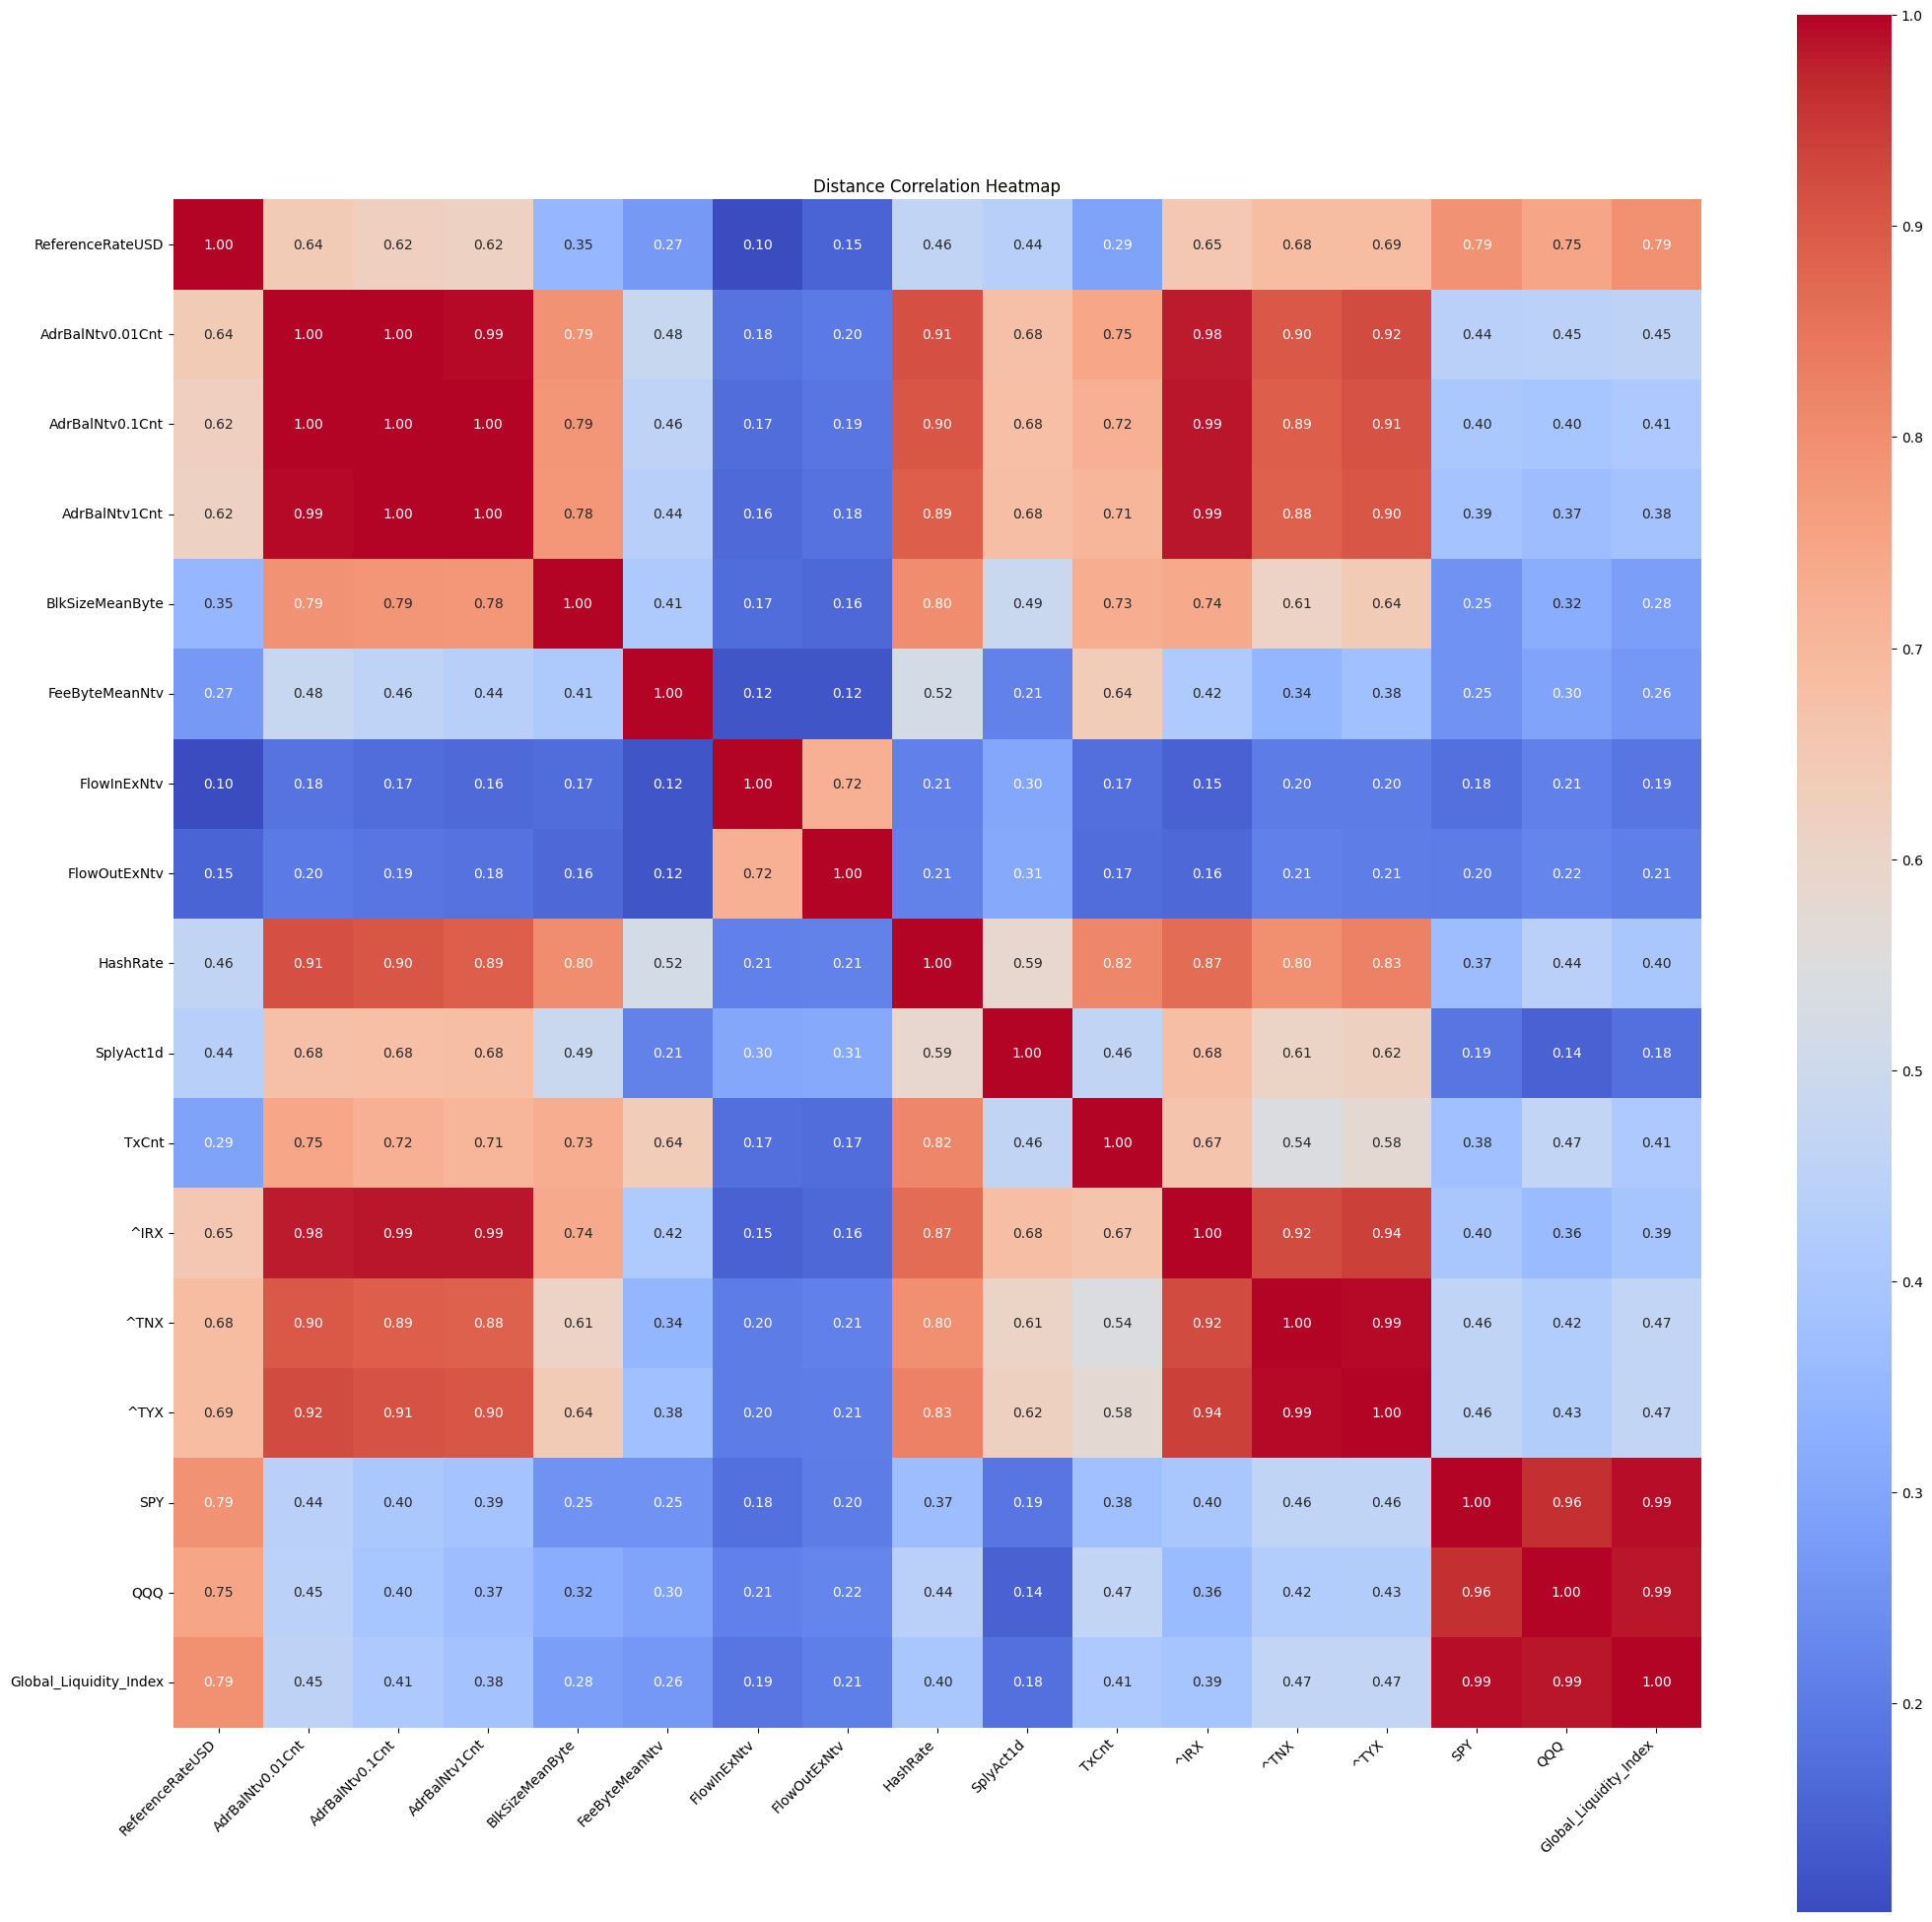

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dcor

# Function to compute pairwise distance correlation
def distance_corr_matrix(df):
    # Convert data to float and handle NaN and Infinity
    df = df.astype(float).replace([np.inf, -np.inf], np.nan).dropna()

    # Scale data if needed
    # df = (df - df.mean()) / df.std()

    cols = df.columns
    n = len(cols)
    dist_corr_matrix = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(n):
            if i != j:
                dist_corr = dcor.distance_correlation(df[cols[i]], df[cols[j]])
                dist_corr_matrix[i, j] = dist_corr
            else:
                dist_corr_matrix[i, j] = 1  # Maximum distance correlation with itself

    dist_corr_matrix = pd.DataFrame(dist_corr_matrix, columns=cols, index=cols)
    return dist_corr_matrix

# Assuming 'df' is your DataFrame and is already loaded
dist_corr_matrix = distance_corr_matrix(df)

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Draw the heatmap
sns.heatmap(dist_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Distance Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
